## Model 3. XGBoost

#### Without hyperparametrics tunning

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score, roc_auc_score,roc_curve



In [2]:
with open('Dataset_After_Preprocessing.pkl', 'rb') as f:
    Dataset_After_Preprocessing = pickle.load(f)

In [3]:

# Memisahkan fitur dan target
X = Dataset_After_Preprocessing.drop(columns=['Exited'])
y = Dataset_After_Preprocessing['Exited']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

# Mengubah tipe data target menjadi integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')


Shape of X_train is: (12545, 16)
Shape of X_test is: (3137, 16)
Shape of y_train is: (12545,)
Shape of y_test is: (3137,)


In [4]:
# asumsikan df_oversampled sudah siap dan merupakan DataFrame yang sesuai
X = Dataset_After_Preprocessing.drop('Exited', axis=1)
y = Dataset_After_Preprocessing['Exited'].astype(int)

# memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# membuat model XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Cross Validation
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5)

# membuat prediksi
y_train_pred_xg = model_xgb.predict(X_train)
y_test_pred_xg = model_xgb.predict(X_test)




In [5]:


# Menghitung dan mencetak metrik evaluasi untuk data training
acc_train_xg = round(accuracy_score(y_train, y_train_pred_xg) * 100, 2)
acc_test_xg = round(accuracy_score(y_test, y_test_pred_xg) * 100, 2)
f1_xg = round(f1_score(y_test, y_test_pred_xg, average="micro") * 100, 2)
recall_xg = round(recall_score(y_test, y_test_pred_xg, average="micro") * 100, 2)
precision_xg = round(precision_score(y_test, y_test_pred_xg, average="micro") * 100, 2)


y_score_xg = model_xgb.predict_proba(X_test)[:,1] # Menggunakan probabilitas kelas positif
roc_auc_xg = roc_auc_score(y_test, y_score_xg)

# Cross-validation
cv_scores_xg= cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')


In [6]:
print("__________________________________Hasil Evaluasi Model XGBoost_________________________________________________")

print("Accuracy Score of Model on Training Data is =>",acc_train_xg,"%")
print("Accuracy Score of Model on Testing Data  is =>",acc_test_xg,"%")
print("F1 Score of the Model is =>",f1_xg)
print("Recall Score of the Model is =>",recall_xg)
print("Precision Score of the Model is =>",precision_xg)
print("ROC AUC Score of the Model is =>", roc_auc_xg)
print("Cross-validation Accuracy Scores:", cv_scores_xg)
print("Mean Cross-validation Accuracy:", cv_scores_xg.mean())
print("___________________________________________________________________________________")


__________________________________Hasil Evaluasi Model XGBoost_________________________________________________
Accuracy Score of Model on Training Data is => 96.25 %
Accuracy Score of Model on Testing Data  is => 89.29 %
F1 Score of the Model is => 89.29
Recall Score of the Model is => 89.29
Precision Score of the Model is => 89.29
ROC AUC Score of the Model is => 0.9537766106641843
Cross-validation Accuracy Scores: [0.90235153 0.89517736 0.9015544  0.89198884 0.89956158]
Mean Cross-validation Accuracy: 0.8981267437225988
___________________________________________________________________________________


- Kita dapat mengamati bahwa recall, precision, dan F1 Score semuanya sama, artinya model kita mencapai keseimbangan sempurna antara mengidentifikasi sampel positif (recall) dengan benar dan meminimalkan positif palsu (precision).
- Nilai untuk F1 score, Recall, dan Precision semuanya kurang lebih 0,7. Sehingga metric ini menunjukkan bahwa model tersebut mencapai akurasi yang baik dalam memprediksi kelas positif.

####  Confussion Matrix and ROC

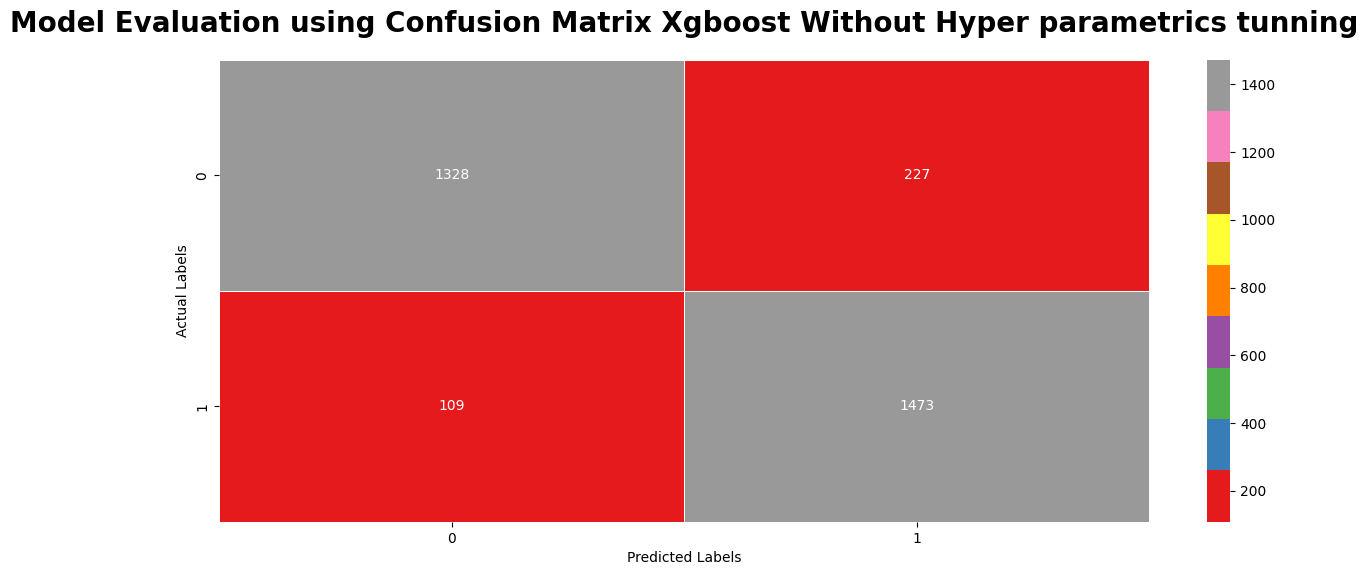

In [7]:
cm = confusion_matrix(y_test,y_test_pred_xg)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix Xgboost Without Hyper parametrics tunning",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

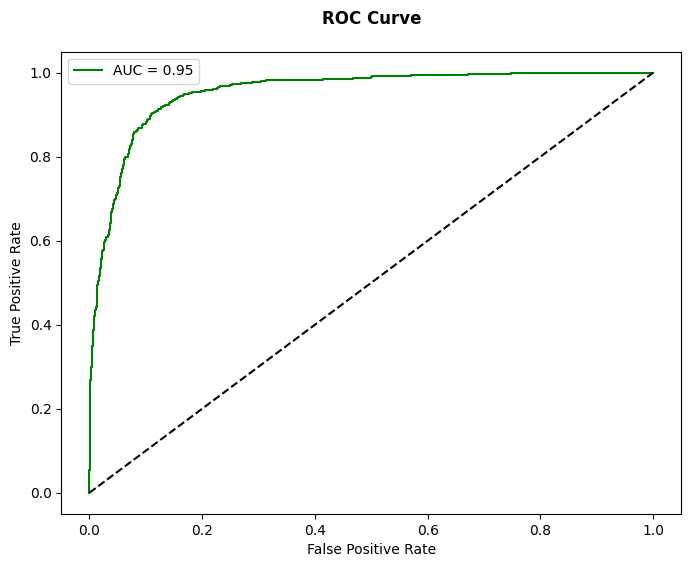

In [8]:
y_pred_proba = model_xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

## XGBoost With Hyper parametrics tunning

Hyperparameter tuning diperlukan untuk:
- menemukan pengaturan optimal dari parameter eksternal dalam model machine learning,
- memastikan performa terbaik,
- mencegah overfitting atau underfitting,
- meningkatkan kemampuan model untuk menggeneralisasi pada data baru.

Pada tahap ini dipilih "Grid Search" karena dataset juga memiliki resource yang cukup baik, dan bisa diperoleh hyperparameter yang paling optimal

In [9]:
# asumsikan df_oversampled sudah siap dan merupakan DataFrame yang sesuai
X = Dataset_After_Preprocessing.drop('Exited', axis=1)
y = Dataset_After_Preprocessing['Exited'].astype(int)

# memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# membuat model XGBoost
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# menentukan grid hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# melakukan grid search untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# mencetak hyperparameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# membuat prediksi menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Cross Validation
cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5)

# menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# menampilkan metrik evaluasi
print("Cross Validation Scores:", cv_scores)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Cross Validation Scores: [0.90235153 0.89517736 0.9015544  0.89198884 0.89956158]
Accuracy: 0.9318
Precision: 0.8968
Recall: 0.9772
F1 Score: 0.9353


In [10]:
# mencari parameter terbaik untuk XGBoost
best_parameters = grid_search.best_params_

print("Parameter terbaik untuk RandomForest yaitu :\n\n")
print(best_parameters)

Parameter terbaik untuk RandomForest yaitu :


{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [11]:
# membuat DecissionTree dengan parameter terbaik
model_xgb_h = XGBClassifier(**best_parameters)

model_xgb_h.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [12]:
# menghitung akurasi model
y_train_pred_xgh = model_xgb_h.predict(X_train)
y_test_pred_xgh = model_xgb_h.predict(X_test)

### Metric Evaluation

####  Accuracy, Precision, Recall, dan F1

In [13]:


# Menghitung dan mencetak metrik evaluasi untuk data training
acc_train_xgh = round(accuracy_score(y_train, y_train_pred_xgh) * 100, 2)
acc_test_xgh = round(accuracy_score(y_test, y_test_pred_xgh) * 100, 2)
f1_xgh = round(f1_score(y_test, y_test_pred_xgh, average="micro") * 100, 2)
recall_xgh = round(recall_score(y_test, y_test_pred_xgh, average="micro") * 100, 2)
precision_xgh = round(precision_score(y_test, y_test_pred_xgh, average="micro") * 100, 2)


y_score_xgh = model_xgb_h.predict_proba(X_test)[:,1] # Menggunakan probabilitas kelas positif
roc_auc_xgh = roc_auc_score(y_test, y_score_xgh)

# Cross-validation
cv_scores_xgh= cross_val_score(model_xgb_h, X_train, y_train, cv=5, scoring='accuracy')


In [14]:
print("__________________________________Hasil Evaluasi Model XGBoost Hyper Parametrics Tunning_________________________________________________")

print("Accuracy Score of Model on Training Data is =>",acc_train_xgh,"%")
print("Accuracy Score of Model on Testing Data  is =>",acc_test_xgh,"%")
print("F1 Score of the Model is =>",f1_xgh)
print("Recall Score of the Model is =>",recall_xgh)
print("Precision Score of the Model is =>",precision_xgh)
print("ROC AUC Score of the Model is =>", roc_auc_xgh)
print("Cross-validation Accuracy Scores:", cv_scores_xgh)
print("Mean Cross-validation Accuracy:", cv_scores_xgh.mean())
print("___________________________________________________________________________________")

__________________________________Hasil Evaluasi Model XGBoost Hyper Parametrics Tunning_________________________________________________
Accuracy Score of Model on Training Data is => 99.98 %
Accuracy Score of Model on Testing Data  is => 93.18 %
F1 Score of the Model is => 93.18
Recall Score of the Model is => 93.18
Precision Score of the Model is => 93.18
ROC AUC Score of the Model is => 0.9754086365502579
Cross-validation Accuracy Scores: [0.93264249 0.9198884  0.92865684 0.92506975 0.93064966]
Mean Cross-validation Accuracy: 0.9273814268632922
___________________________________________________________________________________


- Kita dapat mengamati bahwa recall, precision, dan F1 Score semuanya sama, artinya model kita mencapai keseimbangan sempurna antara mengidentifikasi sampel positif (recall) dengan benar dan meminimalkan positif palsu (precision).
- Nilai untuk F1 score, Recall, dan Precision semuanya kurang lebih 0,7. Sehingga metric ini menunjukkan bahwa model tersebut mencapai akurasi yang baik dalam memprediksi kelas positif.

####  Confussion Matrix and ROC

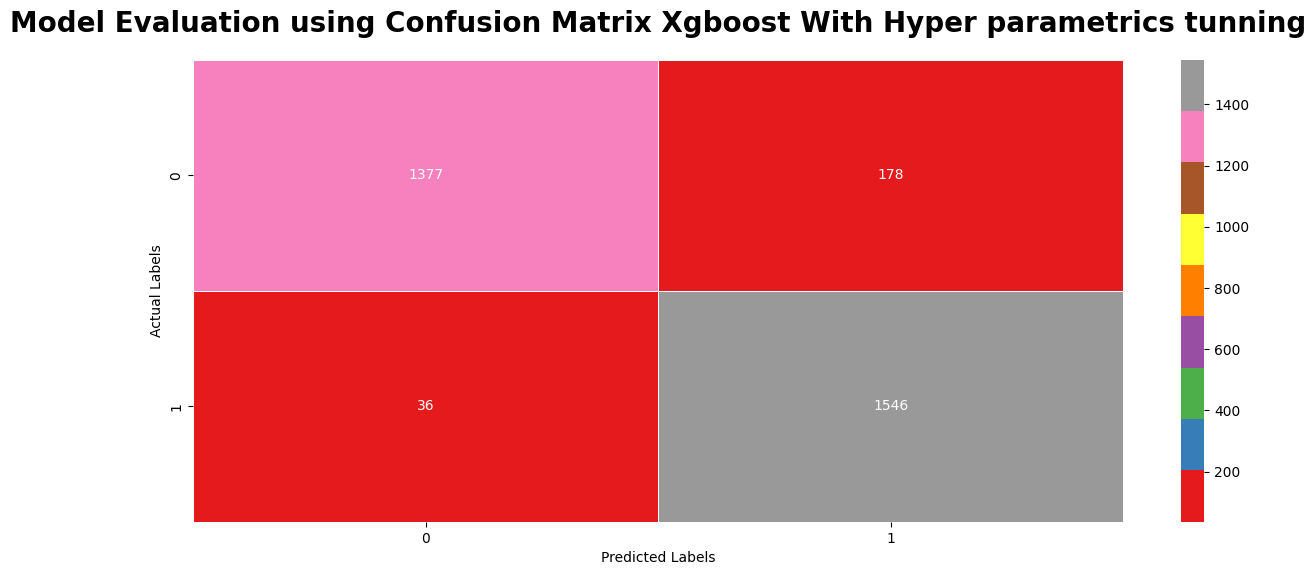

In [15]:
cm = confusion_matrix(y_test,y_test_pred_xgh)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix Xgboost With Hyper parametrics tunning",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

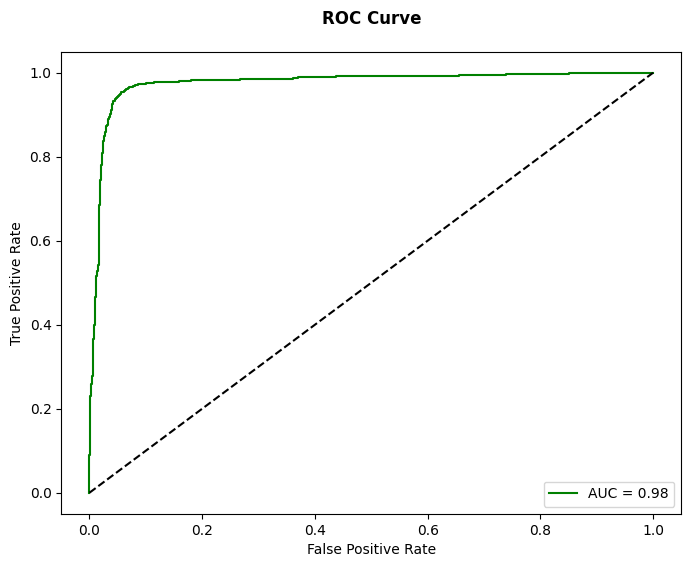

In [16]:
y_pred_proba = model_xgb_h.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

In [17]:
# Menyimpan variabel-variabel ke dalam dictionary
metrics_dict = {
    'xgb' : model_xgb,
    'xgbh' : model_xgb_h,
    'acc_train_dt': acc_train_xg,
    'acc_test_dt': acc_test_xg,
    'f1_dt': f1_xg,
    'recall_dt': recall_xg,
    'precision_dt': precision_xg,
    'roc_auc_dt': roc_auc_xg,
    'cv_scores_dt': cv_scores_xg,
    'acc_train_xgh': acc_train_xgh,
    'acc_test_xgh': acc_test_xgh,
    'f1_xgh': f1_xgh,
    'recall_xgh': recall_xgh,
    'precision_xgh': precision_xgh,
    'roc_auc_xgh': roc_auc_xgh,
    'cv_scores_xgh': cv_scores_xgh
}

# Menyimpan dictionary ke dalam file pickle
with open('XGBOOST.pickle', 'wb') as f:
    pickle.dump(metrics_dict, f)